Results 
This notebook shows some visualizations for our review data and creates a metric file in data/processed

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import os
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [ ]:
# Ensure necessary NLTK resources are downloaded
nltk.download("stopwords")

# Load the processed dataset with sentiment labels
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
input_dir = os.path.join(base_dir, "data", "intermediate")
output_dir = os.path.join(base_dir, "data", "processed")
file_path = os.path.join(input_dir, "reviews_with_sentiment.json")
processed_file_path = os.path.join(input_dir, "processed_reviews_tokens.json")

# Read JSON file into a DataFrame
df = pd.read_json(file_path, lines=True)

# Define stopwords for word cloud generation
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\Lucie\AppData\Local\Temp\ipykernel_22788\2322222502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm", order=["positive", "neutral", "negative"])


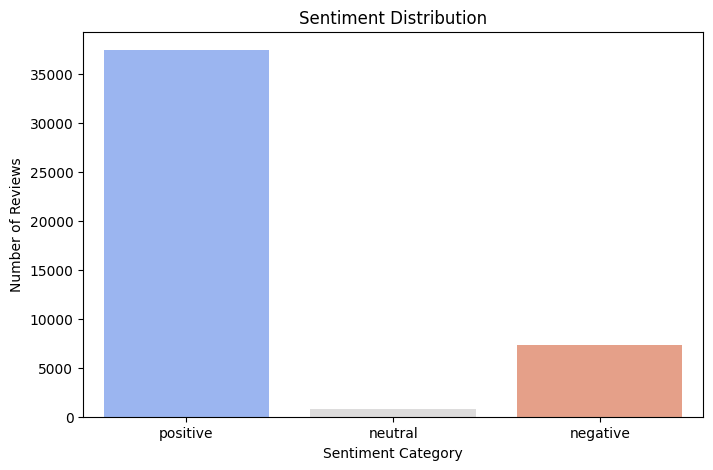

In [6]:
### 1️⃣ Bar Chart of Sentiment Distribution ###
plt.figure(figsize=(8, 5))
sns.countplot(x=df["sentiment"], palette="coolwarm", order=["positive", "neutral", "negative"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.show()

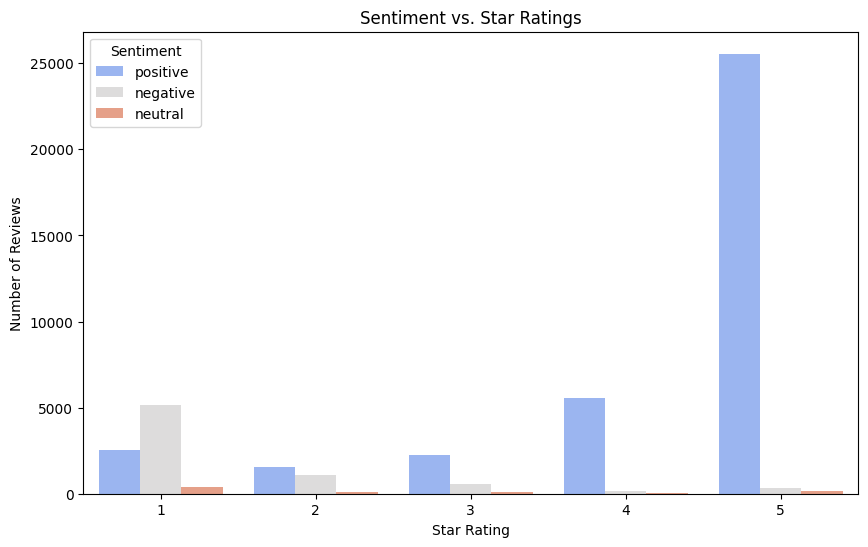

In [7]:
### 2️⃣ Compare Sentiment with Star Ratings ###
plt.figure(figsize=(10, 6))
sns.countplot(x=df["stars"], hue=df["sentiment"], palette="coolwarm")
plt.title("Sentiment vs. Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()

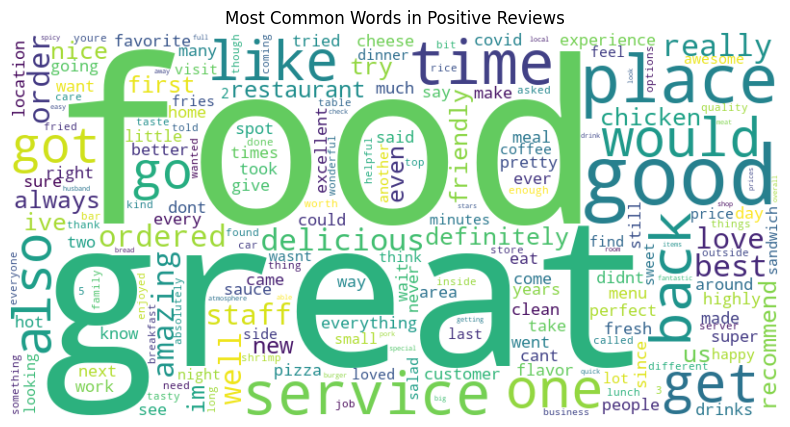

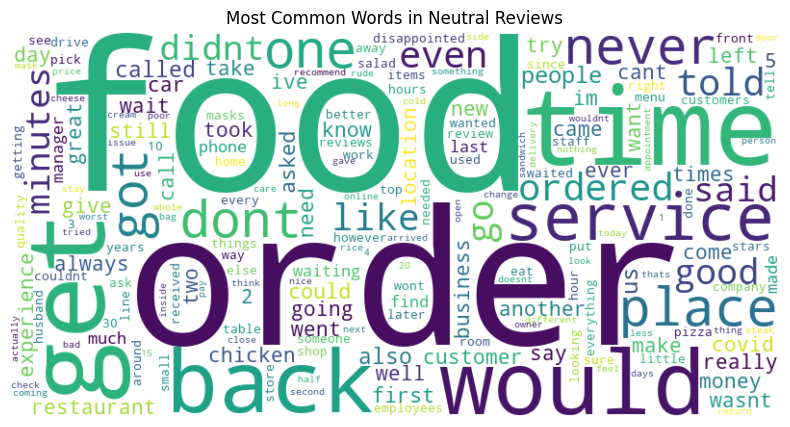

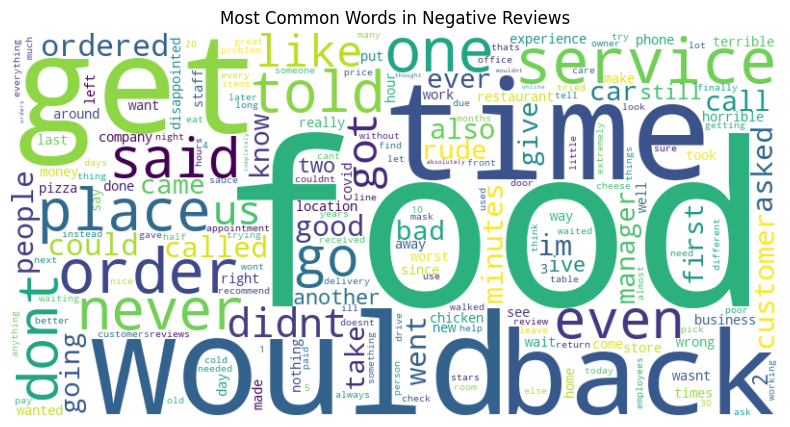

In [8]:
### 3️⃣ WordCloud of Most Common Words in Each Sentiment Category ###
def generate_wordcloud(sentiment_label):
    """
    Generates a word cloud for the most common words in reviews of a given sentiment label.
    """
    text = " ".join(df[df["sentiment"] == sentiment_label]["text"])
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    word_freq = Counter(words)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment_label.capitalize()} Reviews")
    plt.show()

# Generate WordClouds for each sentiment category
for sentiment in ["positive", "neutral", "negative"]:
    generate_wordcloud(sentiment)

In [16]:
### 4️⃣ Review Length Statistics ###

with open(processed_file_path, "r") as file:
    data = [json.loads(line) for line in file]

# Extract review lengths
review_lengths = [len(review["processed_text"]["tokens"]) for review in data]

# Compute other metrics
total_words = sum(review_lengths)
unique_words = len(set([word for review in data for word in review["processed_text"]["tokens"]]))
vocabulary_richness = unique_words / total_words if total_words > 0 else 0
average_review_length = np.mean(review_lengths)
median_review_length = np.median(review_lengths)
max_review_length = np.max(review_lengths)
min_review_length = np.min(review_lengths)

# Create a DataFrame to store the metrics
metrics_data = {
    "Average Review Length": [average_review_length],
    "Median Review Length": [median_review_length],
    "Max Review Length": [max_review_length],
    "Min Review Length": [min_review_length],
    "Total Words": [total_words],
    "Unique Words": [unique_words],
    "Vocabulary Richness": [vocabulary_richness]
}

metrics_df = pd.DataFrame(metrics_data)

# Save metrics to a CSV file
metrics_file_path = os.path.join(output_dir, "review_metrics.csv")
metrics_df.to_csv(metrics_file_path, index=False)

# Display the metrics DataFrame
print(metrics_df)

   Average Review Length  Median Review Length  Max Review Length  \
0              46.962651                  34.0                500   

   Min Review Length  Total Words  Unique Words  Vocabulary Richness  
0                  3      2136331         55496             0.025977  


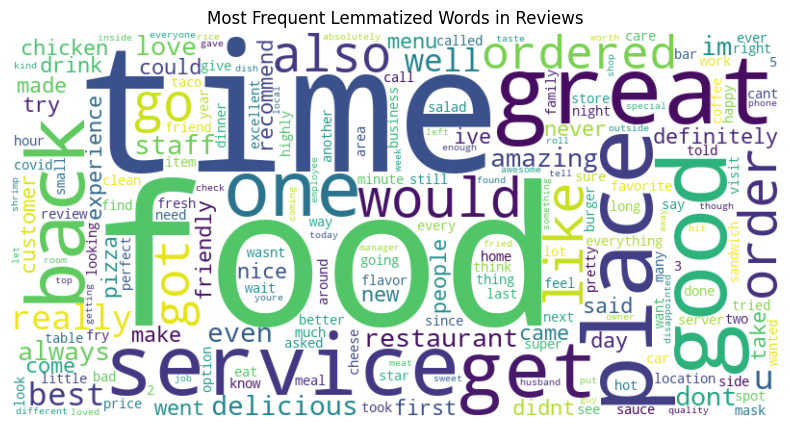

In [12]:
### 5️⃣ WordCloud of Frequent Words from Lemmatized Tokens ###
# Extract all words from lemmatized tokens
all_lemmatized = [token for review in data for token in review["processed_text"]["lemmatized"]]

# Create a word frequency dictionary for lemmatized tokens
word_freq = Counter(all_lemmatized)

# Generate a word cloud from the lemmatized tokens
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Lemmatized Words in Reviews")
plt.show()